# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


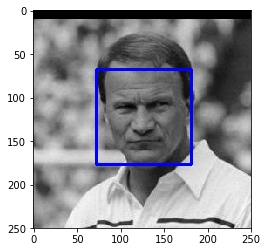

[[ 72  68 109 109]]


In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[4])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()
print(faces)

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__   
The percentages of human faces detected in human files is 98%.  
The percentage of human faces detected in dog files is 17%.

In [4]:
from tqdm import tqdm_notebook as tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]


#-#-# Do NOT modify the code above this line. #-#-#
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
humans = 0
dogs = 0
for file in tqdm(human_files_short):
    if face_detector(file):
        humans +=1
        
for file in tqdm(dog_files_short):
    if face_detector(file):
        dogs +=1

print("Human faces detected in human files: {:.2f}% \nHuman faces detected in dog files: {:.2f}%".format(humans, dogs))


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))


Human faces detected in human files: 98.00% 
Human faces detected in dog files: 17.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

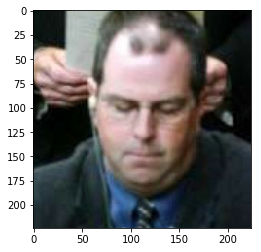

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

#This is a CNN to classify humans and non-humans using the provided images of humans and dogs.

from tqdm import tqdm_notebook as tqdm
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch
from torchvision import models, datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#Data preparation, loading the data as a numpy matrix
np.random.seed(45)

classes = {0 : 'human', 1 : 'non-human'}

#adding zeros as a new column to represent the human class
hdata = np.column_stack((human_files, np.zeros(len(human_files))))
#adding ones as a new column to represent non-human class
ddata = np.column_stack((dog_files, np.ones(len(dog_files))))
dataset = np.concatenate((hdata, ddata))

#dictionary to hold the image file path
datadict = {i : [j[0], int(j[1][0])] for i, j in enumerate(dataset)}

indices = np.array(range(len(dataset)))
classes = np.array([j[1] for j in datadict.values()])

#final dataset is in the following format [Index Class],
#where index leads to the file path by loading it as a key into the datadict folder.
datanp = np.vstack((indices, classes)).T 
np.random.shuffle(datanp)

traindata = datanp[:int(0.6*len(datanp))]
testdata = datanp[int(0.6*len(datanp)):int(0.8*len(datanp))]
validdata = datanp[int(0.8*len(datanp)):]

train_transforms = transforms.Compose([transforms.Resize(250), transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


def load_image(idx, itransforms = train_transforms):
    """ A function to open and load the image into the neural network as a tensor.
    Args:
        idx: Image index/indices to be loaded into the dataset dictionary to return the image(s) file path
        itransforms: optional argument (default is train_transforms) to apply a set of transforms on the image
    Returns:
        images: a pytorch tensor with the dimensions of [batch_size, 3, w, h]
    """
    first_image = itransforms(Image.open(datadict[idx[0].item()][0])).unsqueeze(0)
    imagesnp = first_image.numpy()
    for i in range(1, len(idx)):
        filepath = datadict[idx[i].item()][0]
        img = Image.open(filepath)
        imgdata = itransforms(img).unsqueeze(0)
        imgdatanp = imgdata.numpy()
        imagesnp = np.concatenate((imagesnp, imgdatanp))
        
    images = torch.from_numpy(imagesnp)    
    return images
        
trainloader = torch.utils.data.DataLoader(traindata, batch_size = 64, shuffle = True)
validloader = torch.utils.data.DataLoader(validdata, batch_size = 32, shuffle = True)
testloader = torch.utils.data.DataLoader(testdata, batch_size = 32, shuffle = True)



#viewing one image
data = next(iter(testloader))
img = load_image(data[:,0], itransforms = test_transforms)[0]
def im_convert(img):
    """takes a tensor img and converts it into numpy format after de-normalizing it. """
    imgnp = img.cpu().numpy().squeeze()
    imgnp = imgnp.transpose(1, 2, 0)
    imgnp = imgnp * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    imgnp = imgnp.clip(0, 1)
    return imgnp
plt.imshow(im_convert(img))            

In [6]:
#model architecture
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding =1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding =1)
        self.fc1 = nn.Linear(64*14*14, 400)
        self.fc2 = nn.Linear(400, 2)
        
        self.pool = nn.MaxPool2d(4,4)
        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*14*14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim = 1)
        
        return x
    
hc_model = Network()
hc_model.to(device)
print(hc_model)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(hc_model.parameters(), lr = 0.001)

def train_model(model, trainloader, validloader, criterion, optimizer, save_path):
    epochs = 4
    steps = 0
    print_every = 40
    for i in range(epochs):
        running_loss = 0
        for data in tqdm(trainloader):
            steps += 1
            imageidx = (data[:,0])
            labels = (data[:,1])
            labels = labels.to(device)
            images = load_image(imageidx)
            images = images.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if steps % print_every == 0:
                accuracy = 0
                test_loss = 0
                model.eval()
                with torch.no_grad():
                    for data in tqdm(validloader):
                        imageidx = (data[:,0])
                        labels = (data[:,1])
                        labels = labels.to(device)
                        images = load_image(imageidx, itransforms = test_transforms)
                        images = images.to(device)
                        testoutput = model(images)
                        test_loss += (criterion(testoutput, labels)).item()
                        ps = torch.exp(testoutput)
                        equality = (labels.data == ps.max(dim=1)[1])
                        equality = (equality.type(torch.FloatTensor)).to(device)
                        accuracy += torch.mean(equality)

                model.train()
                print('Epoch : {}, Running Loss : {:.2f}, Test Loss : {:.2f}, Accuracy : {:.2f}'.format(i +1,
                                                                                                      running_loss/print_every,
                                                                                                      test_loss/len(validloader),
                                                                                                      accuracy/len(validloader)))
                running_loss = 0
    torch.save(model.state_dict(), save_path)
    return model

#hc_model = train_model(hc_model, trainloader, validloader, criterion, optimizer, 'humans-dogs.cpt')

Network(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=2, bias=True)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
)


In [7]:
#Loading the saved checkpoint

hc_model.load_state_dict(torch.load('humans-dogs.cpt', map_location=lambda storage, loc: storage))

def human_detector(path):
    itransforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224), transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    img = itransforms(Image.open(path)).unsqueeze(0)
    img = img.to(device)
    output = torch.exp(hc_model(img))
    pred = output.max(dim=1)[1]
    return pred == 0




HBox(children=(IntProgress(value=0, max=13233), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8351), HTML(value='')))


Human faces detected in human files: 98.23%
Human faces detected in dog files: 0.47%


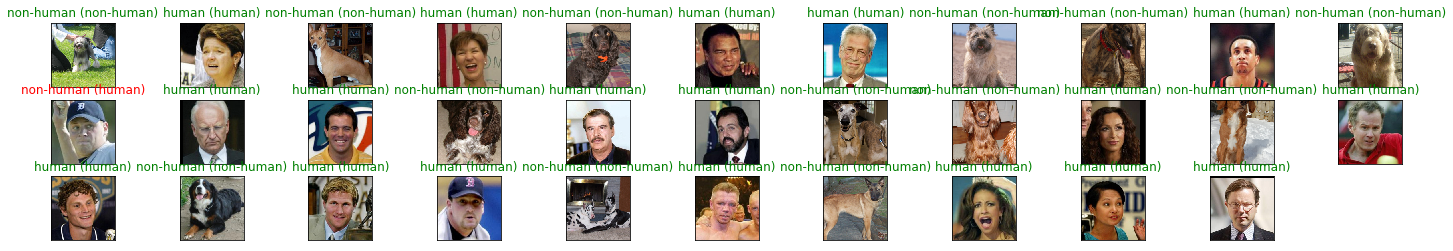

In [8]:
#testing the human_detector:
humans = 0
dogs = 0
for file in tqdm(human_files):
    if human_detector(file):
        humans += 1
for file in tqdm(dog_files):
    if human_detector(file):
        dogs += 1
    
print("Human faces detected in human files: {:.2f}%".format(100*humans / len(human_files)))
print("Human faces detected in dog files: {:.2f}%".format(100*dogs / len(dog_files)))


#Visualizing test samples
classes = {0 : 'human', 1 : 'non-human'}
data = next(iter(testloader))
labels = data[:,1]
images = load_image(data[:,0], itransforms = test_transforms)
images = images.to(device)
output = hc_model(images)
preds_tensor = torch.max(torch.exp(output), 1)[1]
preds = (np.squeeze(preds_tensor.cpu().numpy()))

# plotting the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(32):
    ax = fig.add_subplot(3, 33/3 , idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx].item()]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))
    


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 93694550.79it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

test_transforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    itransforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224), transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    img = itransforms(Image.open(img_path)).unsqueeze(0)
    VGG16.to(device)
    img = img.to(device)
    output = VGG16(img)
    idx = int((torch.exp(output)).max(dim=1)[1])
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return idx # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    dogs = VGG16_predict(img_path)
    
    return dogs >= 151 and dogs <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__   
The percentage of dogs detected in human_files_short is 1%.  
The percentage of dogs detected in dog_files_short is 100%.

In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogs = 0
humans = 0
for file in tqdm(human_files_short):
    if dog_detector(file):
        humans += 1
for file in tqdm(dog_files_short):
    if dog_detector(file):
        dogs += 1
print("Dogs detected in dog files: {}% \nDogs detected in human files: {}%".format(dogs, humans))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))


Dogs detected in dog files: 100% 
Dogs detected in human files: 1%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
from tqdm import tqdm_notebook as tqdm
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
import scipy


incept = models.inception_v3(pretrained=True)

use_cuda = torch.cuda.is_available()

if use_cuda:
    incept = incept.cuda()
    
inc_transforms = transforms.Compose([transforms.Resize(320), transforms.CenterCrop(299),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    

def alt_dog_detector(img_path):
    img = inc_transforms(Image.open(img_path)).unsqueeze(0)
    incept.eval()
    incept.to(device)
    img = img.to(device)
    output = incept(img)
    idx = int((torch.exp(output)).max(dim=1)[1])
    return idx >= 151 and idx <= 268

dogs = 0
humans = 0
for file in tqdm(human_files_short):
    if alt_dog_detector(file):
        humans += 1
for file in tqdm(dog_files_short):
    if alt_dog_detector(file):
        dogs += 1
print("Dogs detected in dog files: {}% \nDogs detected in human files: {}%".format(dogs, humans))



Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 93702496.83it/s]


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))


Dogs detected in dog files: 100% 
Dogs detected in human files: 0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

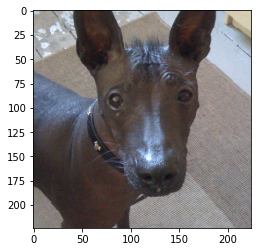

In [14]:
import os
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
from tqdm import tqdm_notebook as tqdm
from PIL import Image
from PIL import ImageFile
import torch
from torchvision import models, datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

dirs = {'train' : '/data/dog_images/train',
       'valid' : '/data/dog_images/test',
       'test' : '/data/dog_images/valid'}

train_transforms = transforms.Compose([transforms.Resize(250), transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(15),
                                       transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

traindata_s = datasets.ImageFolder(dirs['train'], transform = train_transforms)
validdata_s = datasets.ImageFolder(dirs['valid'], transform = test_transforms)
testdata_s = datasets.ImageFolder(dirs['test'], transform = test_transforms)

loaders_scratch = {'train' : torch.utils.data.DataLoader(traindata_s, batch_size = 64, shuffle = True), 
                  'valid' : torch.utils.data.DataLoader(validdata_s, batch_size = 32, shuffle = True),
                  'test' : torch.utils.data.DataLoader(testdata_s, batch_size = 32, shuffle = True)}


#viewing one image
imgs, labels = next(iter(loaders_scratch['test']))
def im_convert(img):
    imgnp = img.cpu().numpy().squeeze()
    imgnp = imgnp.transpose(1, 2, 0)
    imgnp = imgnp * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    imgnp = imgnp.clip(0, 1)
    return imgnp
plt.imshow(im_convert(imgs[0]))            

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  
- I created to sets of transforms to be applied over the training dataset and test and validation datasets respectively. 
    - The training dataset transforms apply resize first, then a random resized crop at the size of 224, then a random horizontal flip, followed by random rotation of 15 degrees then converting the image to a tensor and normalizing it.
    - The validation and testing datasets are only resized then centercropped at 224, then converted to a tensor and normalized.
- The size of 224 was chosen as it's good enough for optimimum training without slowing down the process, and it allows for good feature extraction as per most of the most prominent classification architectures.
- I augmented the training dataset with random resized crop, random rotation and random horizontal flip to enhance the training process and allow the model to be trained on more variations of the input data. 


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.fc1 = nn.Linear(64*28*28, 1000)
        self.fc2 = nn.Linear(1000, 400)
        self.fc3 = nn.Linear(400, 133)
        self.pool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(p=0.4)
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64*28*28)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
The steps to create this CNN architecture was as follows:  
- First, a series of convolutional layers were built to detect features in the image, with a kernel size of 3 and a padding of 1, and a maxpooling layer with a stride of 2 was used to decrease the input size and concentrate on the most important features while the depth of the network increased by each succession of layers.  
- Second, a fully connected network was built as a classifier that took the flattened output of the feature detector and returned the log of the probabilities of the predicted classes, since the criterion to be used is a negative-log loss.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
from workspace_utils import active_session
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        accuracy = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(tqdm(loaders['train'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1/(batch_idx+1)) * (loss.data - train_loss))
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(tqdm(loaders['valid'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            with torch.no_grad():
                output = model(data)
                loss = criterion(output, target)
                valid_loss += ((1/(batch_idx +1)) * (loss.data - valid_loss))
                equality = ((torch.exp(output)).max(dim=1)[1] == target.data).type(torch.FloatTensor)
                if use_cuda:
                    equality = equality.cuda()

                accuracy += ((1/(batch_idx +1)) * (torch.mean(equality) - accuracy))
            ## update the average validation loss

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tAccuracy: {}'.format(
            epoch, 
            train_loss,
            valid_loss,
            accuracy
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation Loss decreased, saving model...')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
#with active_session():
    #model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt', map_location=lambda storage, loc : storage))


def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.333385


Test Accuracy: 17% (145/835)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

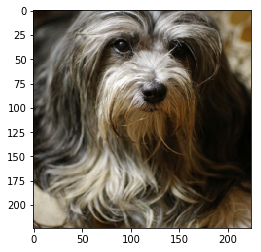

In [19]:
## TODO: Specify data loaders

import os
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
from tqdm import tqdm_notebook as tqdm
from PIL import Image
from PIL import ImageFile
import torch
from torchvision import models, datasets, transforms
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

dirs = {'train' : '/data/dog_images/train',
       'valid' : '/data/dog_images/test',
       'test' : '/data/dog_images/valid'}

train_transforms = transforms.Compose([transforms.Resize(250), transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(15),
                                       transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data_transfer = {'train' : datasets.ImageFolder(dirs['train'], transform = train_transforms),
                 'valid' : datasets.ImageFolder(dirs['valid'], transform = test_transforms),
                 'test' :  datasets.ImageFolder(dirs['test'], transform = test_transforms)}

loaders_transfer = {'train' : torch.utils.data.DataLoader(data_transfer['train'], batch_size = 64, shuffle = True), 
                  'valid' : torch.utils.data.DataLoader(data_transfer['valid'], batch_size = 32, shuffle = True),
                  'test' : torch.utils.data.DataLoader(data_transfer['test'], batch_size = 32, shuffle = True)}


#viewing one image
imgs, labels = next(iter(loaders_transfer['test']))
def im_convert(img):
    imgnp = img.cpu().numpy().squeeze()
    imgnp = imgnp.transpose(1, 2, 0)
    imgnp = imgnp * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    imgnp = imgnp.clip(0, 1)
    return imgnp
plt.imshow(im_convert(imgs[0]))            


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet152(pretrained = True)

for param in model_transfer.parameters():
    param.requires_grad = False
classifier = nn.Sequential(nn.Linear(model_transfer.fc.in_features, 400),
                                     nn.ReLU(),
                                     nn.Dropout(p=0.2),
                                     nn.Linear(400, 133),
                                     nn.LogSoftmax(dim=1))
model_transfer.fc = classifier                                     
if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:10<00:00, 22069516.24it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
The steps to create this CNN architecture was as follows:  
- I implemented transfer learning by utilizing an already trained ResNET152 model, froze the parameters of the feature detector (convolutional layers) and replaced the fully connected layer with a classifier that is to be trained on the training data to better the ResNET model to the requested classes.  
- This architecture is better suited to solve this problem since the model has already been trained as a feature detector 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
criterion_transfer = nn.NLLLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.fc.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
n_epochs = 5
#model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location = lambda storage, loc : storage))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.475597


Test Accuracy: 84% (707/835)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [24]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    itransforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224), transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    img = itransforms(Image.open(img_path)).unsqueeze(0)
    img = img.to(device)
    model_transfer.eval()
    output = model_transfer(img)
    idx = (torch.exp(output)).max(dim=1)[1]
    return class_names[idx]

print(predict_breed_transfer(dog_files[0]), print(dog_files[55]))

/data/dog_images/train/103.Mastiff/Mastiff_06809.jpg
Bullmastiff None


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [25]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    """handles cases for a human face, dog, and neither 
    Args:
        img_path: it can be a string or a list or a numpy array of image file paths.
    Returns:
        The function prints results of classification on the plotted input image(s).
    """
    
    def run_app_img(file):
        result = ''
        if human_detector(file) and face_detector(file):
            result = "Hello, human! \nYou look like a .... \n{}".format(predict_breed_transfer(file))
        elif dog_detector(file):
            result = "Hi, doggie! \nYour breed is .... \n{}".format(predict_breed_transfer(file))
        else:
            result = 'The photo you provided is neither of a dog nor a human :) \nPlease use a different photo.'
        return result
    

    if isinstance(img_path, str):
        imglist = []
        imglist.append(img_path)
    
    else:
        imglist = img_path
        
    for i in range(len(imglist)):
        result = run_app_img(imglist[i])
        fig = plt.figure(figsize=(10, 4))
        ax = fig.add_subplot(len(imglist), 1 , i+1, xticks =[], yticks = [])
        img = np.array(Image.open(imglist[i]))
        plt.imshow(img)
        ax.set_title("{}".format(result))


            

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)  
The output is as I expected since the algorithm starts by detecting humans using both face-detection and human-detection algorithms. If not found it tries to detect dogs. However, it could be a bit better by applying the following improvements:
- The algorithm fails to detect humans in groups. The Haar-like feature face-detection algorithm provided has a moderate error percentage as it detects non-human faces as human faces, that's why I added my own trained CNN to detect humans which provides much higher accuracy, but it's trained on the human images provided. So, it cannot detect human faces in groups. What needs to be improved is training the human-detector on images of humans in groups.
- More training needs to be done on the dog breed classifier to increase accuracy (currently it is 84%).
- An additional classifier can be added to detect the type of image provided (if not human or dog).


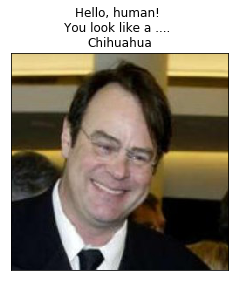

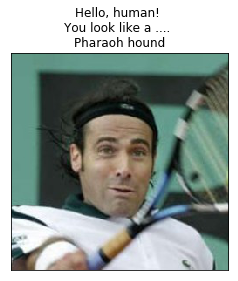

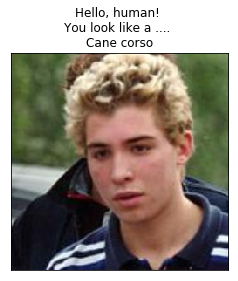

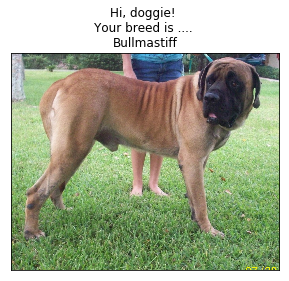

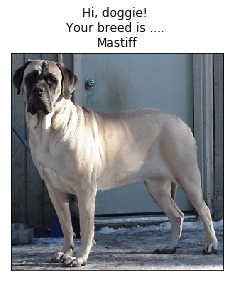

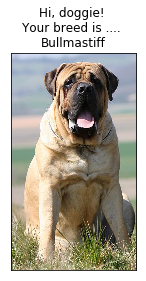

In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

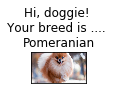

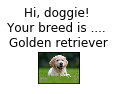

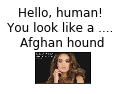

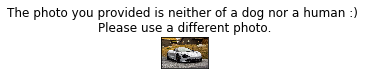

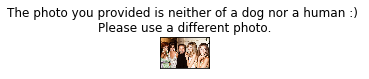

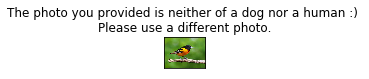

In [27]:
test_files = np.array(glob("test_images/*"))

#testing the app on an array of test files
run_app(test_files)

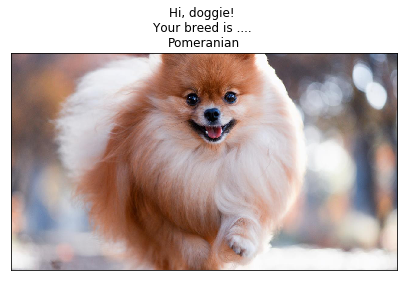

In [28]:
run_app('test_images/dog2.jpg')